In [20]:
import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Sample ID', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Sample ID,max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,L10,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,L11,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,L12,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,L2,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,L3,9.021096
...,...,...,...,...,...
499,"4,5-dichloro-o-phenylenediamine",Nc1cc(Cl)c(Cl)cc1N,0.700,L53,0.157703
500,"N,N'-diphenyl-p-phenylenediamine",N(c1ccccc1)c2ccc(Nc3ccccc3)cc2,0.700,L54,0.011934
501,3-mercaptopropionic acid,OC(=O)CCS,0.700,L55,11.290852
502,"3,3,3 triphenyl propionic acid",OC(=O)CC(c1ccccc1)(c2ccccc2)c3ccccc3,0.700,L56,0.218561


## Heat map of the max H2 produced

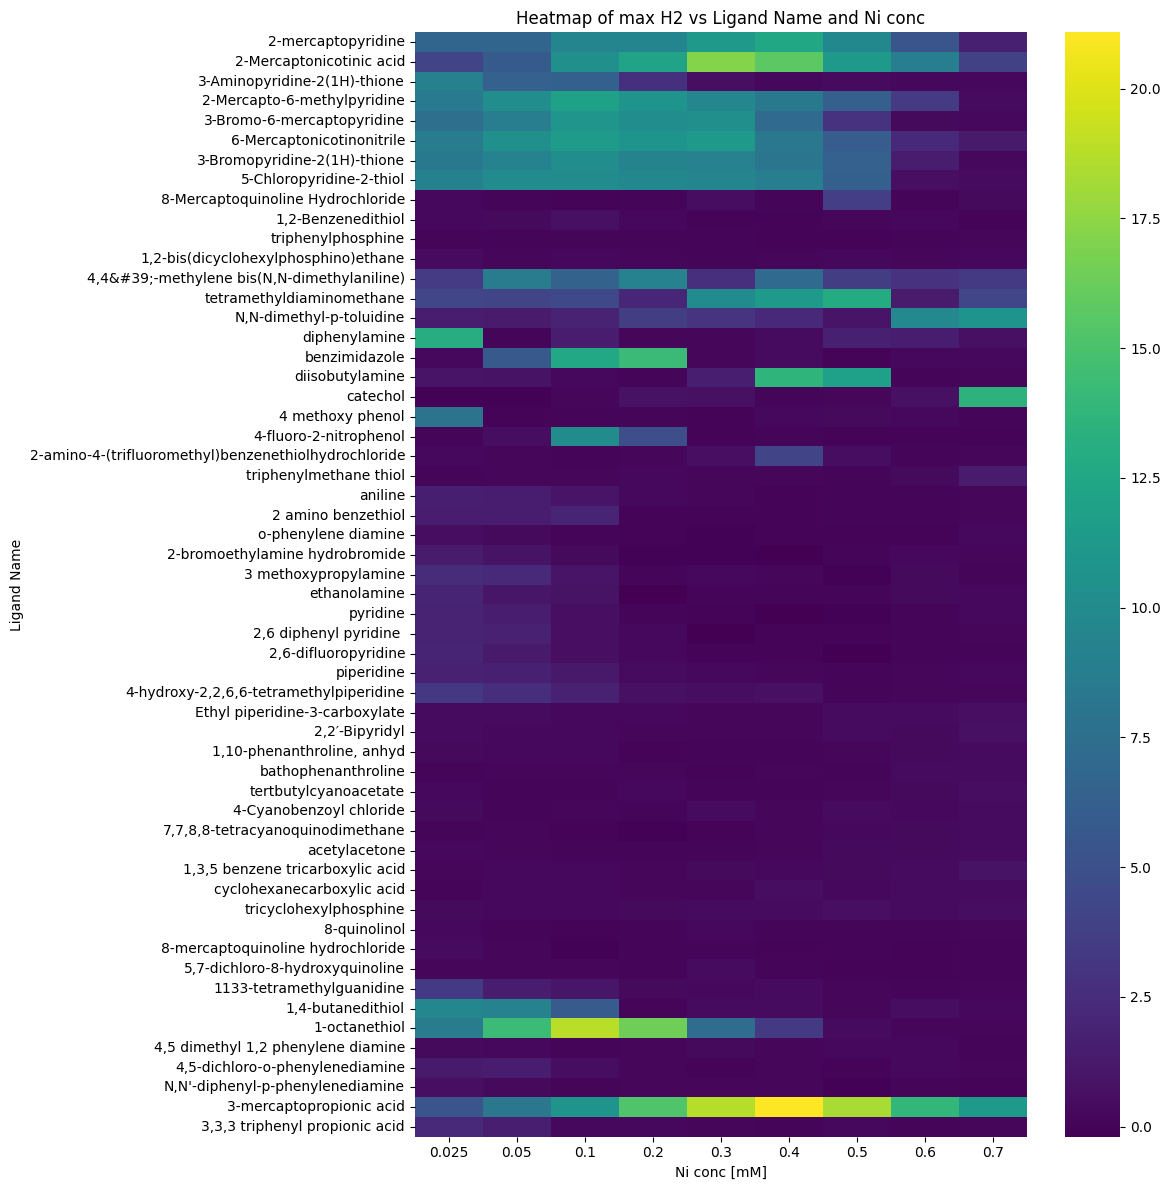

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract numeric part for sorting
df["SampleNum"] = df["Sample ID"].str.extract(r'(\d+)').astype(int)

# Pivot table: rows = SampleNum, columns = Ni conc, values = max h2
heatmap_data = df.pivot_table(
    index=["SampleNum", "Ligand Name"],  # use ligand name here for display
    columns="Ni conc [mM]",
    values="max h2 (umol)",
    aggfunc="mean"
).sort_index(level="SampleNum")  # sorts by numeric order

# For the heatmap, use ligand names as the y-axis
heatmap_data_ligand = heatmap_data.copy()
heatmap_data_ligand.index = heatmap_data_ligand.index.get_level_values(1)  # Ligand Name

plt.figure(figsize=(12, 12))
ax = sns.heatmap(heatmap_data_ligand, cmap="viridis", annot=False)

plt.title("Heatmap of max H2 vs Ligand Name and Ni conc")
plt.ylabel("Ligand Name")
plt.xlabel("Ni conc [mM]")
plt.tight_layout()
plt.show()

### Visualize the mean value of the max H2 produced across all the Ni concentrations for each Ligand

#### It is good that this mean value is showing variablility across the different ligands. This means that we can use it as a target for our model.

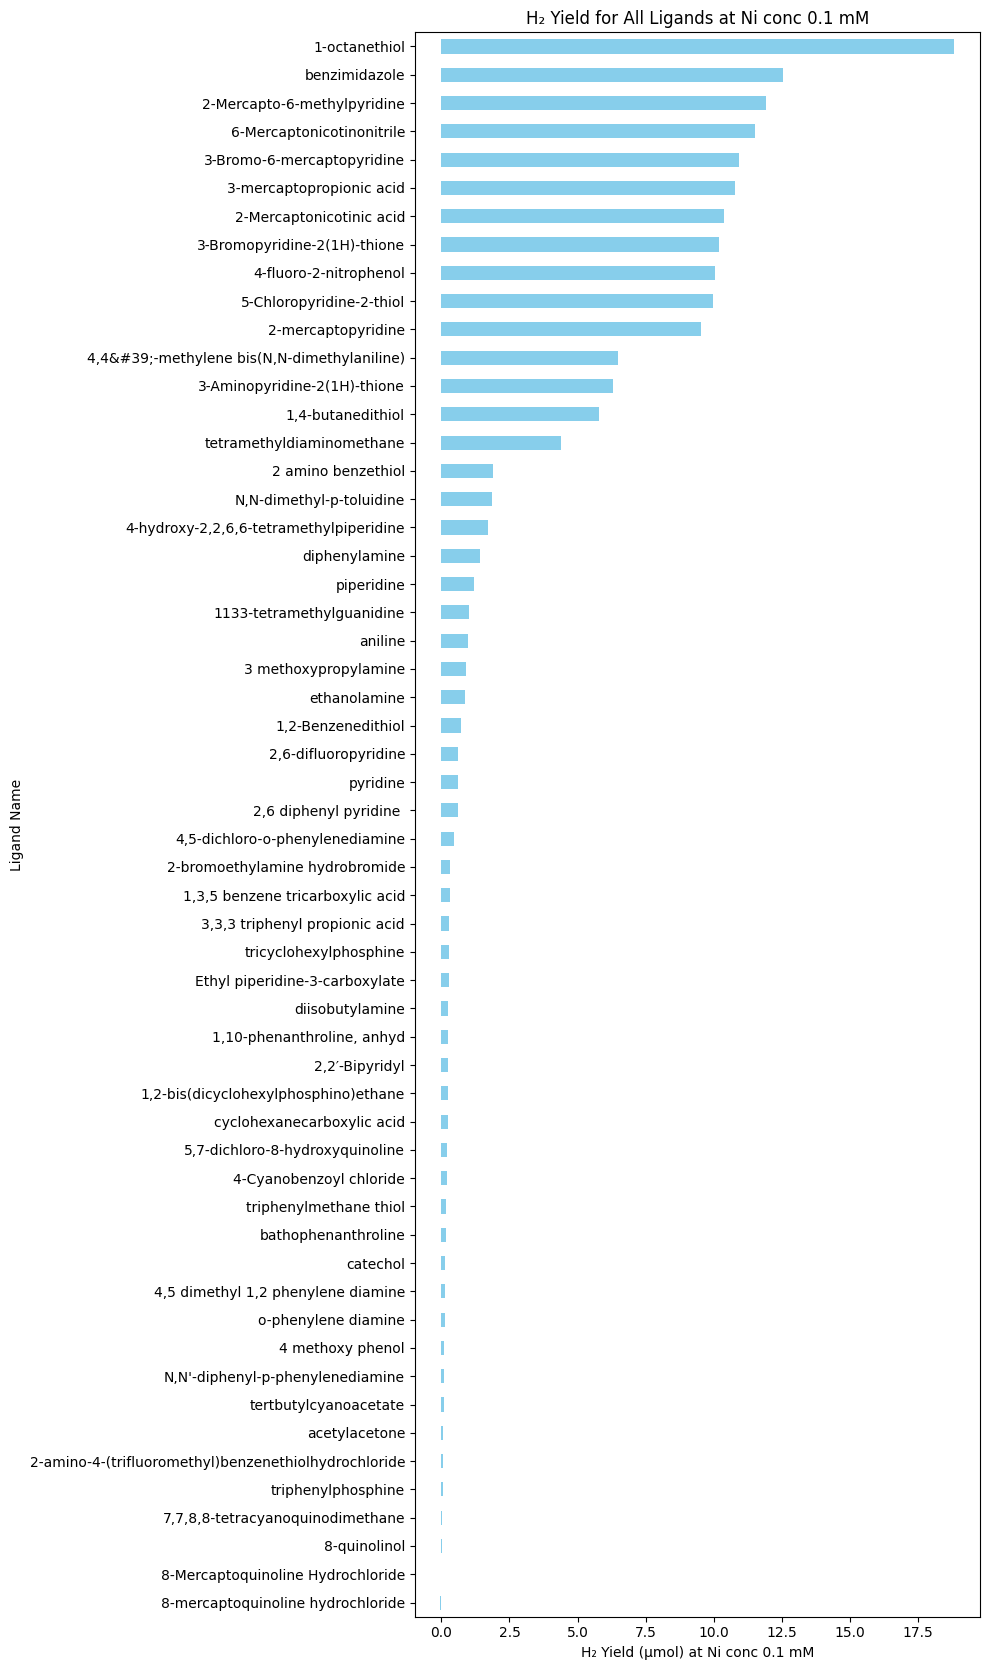

In [22]:
import matplotlib.pyplot as plt

# Filter for Ni conc = 0.1 mM
# FIX: Added 'by="max h2 (umol)"' to tell sort_values which column to use.
df_ni01 = df[df["Ni conc [mM]"] == 0.1].sort_values(by="max h2 (umol)", ascending=False)

# Group by Ligand Name and take the first (and only) value for 'max h2 (umol)'
ligand_h2 = df_ni01.groupby("Ligand Name")["max h2 (umol)"].first().sort_values(ascending=False)

# Horizontal bar plot
plt.figure(figsize=(10, len(ligand_h2) * 0.3))
ligand_h2.plot(kind="barh", color="skyblue")
plt.xlabel("H₂ Yield (µmol) at Ni conc 0.1 mM")
plt.ylabel("Ligand Name")
plt.title("H₂ Yield for All Ligands at Ni conc 0.1 mM")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [23]:
df_ni01.groupby("Ligand Name")["max h2 (umol)"].first().sort_values(ascending=False)

Ligand Name
1-octanethiol                                           18.832912
benzimidazole                                           12.554330
2-Mercapto-6-methylpyridine                             11.916718
6-Mercaptonicotinonitrile                               11.499528
3-Bromo-6-mercaptopyridine                              10.921355
3-mercaptopropionic acid                                10.778971
2-Mercaptonicotinic acid                                10.366413
3-Bromopyridine-2(1H)-thione                            10.186278
4-fluoro-2-nitrophenol                                  10.047959
5-Chloropyridine-2-thiol                                 9.954984
2-mercaptopyridine                                       9.522341
4,4&#39;-methylene bis(N,N-dimethylaniline)              6.500432
3-Aminopyridine-2(1H)-thione                             6.285898
1,4-butanedithiol                                        5.800484
tetramethyldiaminomethane                                4.38676

[01:16:53] WARNING: not removing hydrogen atom without neighbors
[01:16:53] WARNING: not removing hydrogen atom without neighbors
[01:16:53] WARNING: not removing hydrogen atom without neighbors


Fingerprint matrix shape: (56, 1024)
Top 15 important fingerprint bits: [ 90 806 139 482 693 229 652 843 435 881  97  33 700 842  52]
Reduced X shape: (56, 15)

Training Logistic Regression...

Logistic Regression - Test Set:
              precision    recall  f1-score   support

         Low       0.89      1.00      0.94         8
        High       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12


Logistic Regression - Training Set:
              precision    recall  f1-score   support

         Low       0.90      0.96      0.93        27
        High       0.93      0.82      0.88        17

    accuracy                           0.91        44
   macro avg       0.91      0.89      0.90        44
weighted avg       0.91      0.91      0.91        44


Training Random Forest...

Random Forest - Test Set:
              precision    re

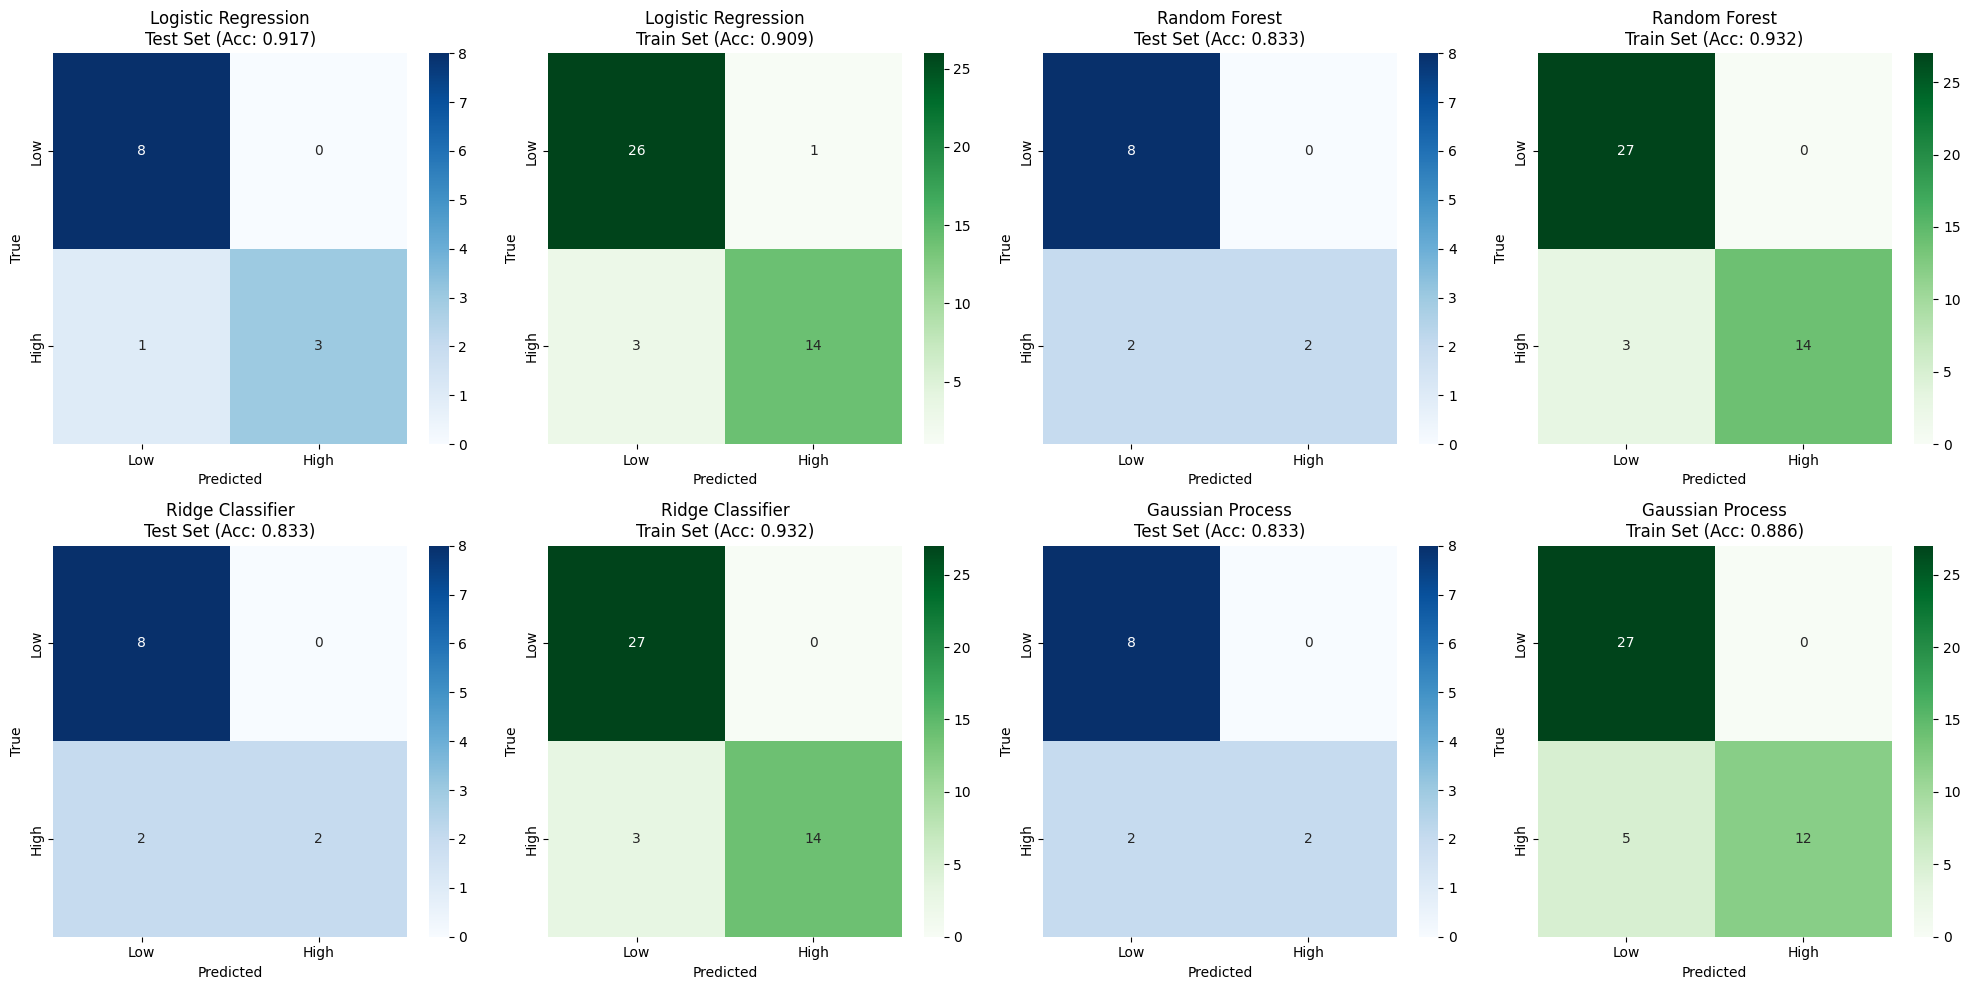

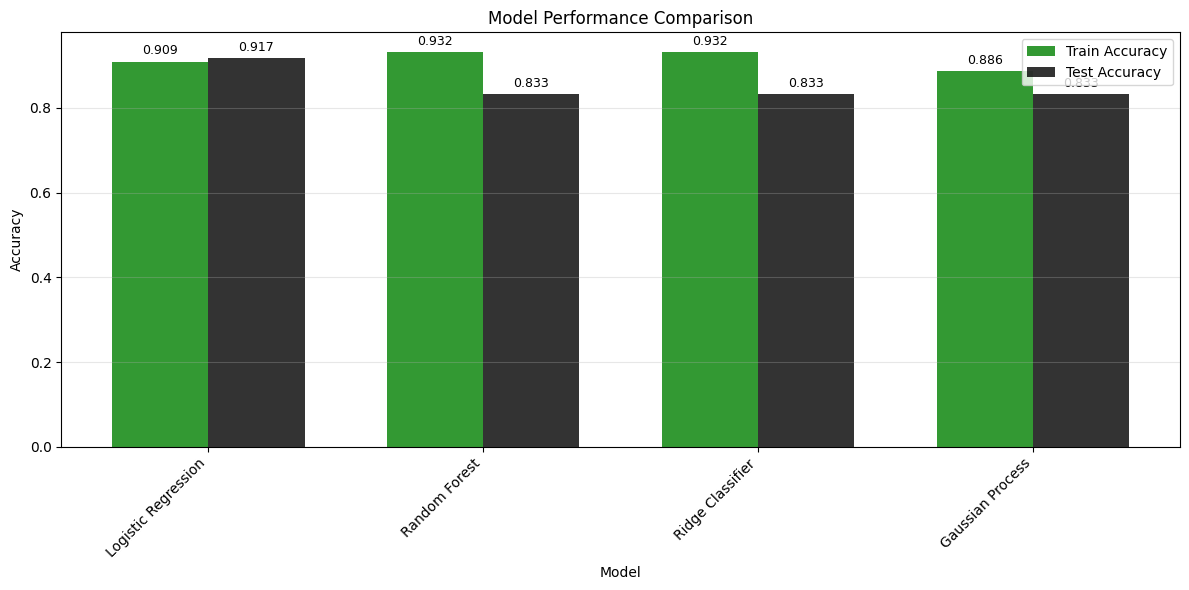


Model Performance Summary
              Model Train Accuracy Test Accuracy Overfitting
Logistic Regression         0.9091        0.9167     -0.0076
      Random Forest         0.9318        0.8333      0.0985
   Ridge Classifier         0.9318        0.8333      0.0985
   Gaussian Process         0.8864        0.8333      0.0530


In [50]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, rdFingerprintGenerator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 0: Load ligand names and H2 values ---
ligands = df_ni01["Ligand Name"].values
h2 = df_ni01["max h2 (umol)"].values

# Handle NaN or negative values
h2 = np.nan_to_num(h2, nan=0.0)
h2[h2 < 0] = 0.0

# --- Step 1: Convert H2 to binary classes ---
# 0 = Low (<=1), 1 = High (>1)
y = (h2 > 1).astype(int)

# --- Step 2: Convert SMILES to Morgan fingerprints ---
mols = [Chem.MolFromSmiles(s) for s in df_ni01['SMILES']]
valid_idx = [i for i, m in enumerate(mols) if m is not None]

mols = [mols[i] for i in valid_idx]
y = y[valid_idx]

# Create generator
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)

# Use it to generate fingerprints
X = np.array([
    morgan_gen.GetFingerprint(m)
    for m in mols
])

print("Fingerprint matrix shape:", X.shape)

# --- Step 2b: Feature selection using Random Forest ---
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X, y)

# Sort features by importance
importances = rf.feature_importances_
top_indices = np.argsort(importances)[-15:]  # top 15 most important bits
top_indices = top_indices[::-1]  # descending order

print("Top 15 important fingerprint bits:", top_indices)

# Reduce X to top 15 fingerprint bits
X_reduced = X[:, top_indices]

print("Reduced X shape:", X_reduced.shape)

# --- Step 3: Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 4: Initialize all classifiers ---
clf = {
    'Logistic Regression': LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=500
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=42,
        class_weight='balanced'
    ),
    'Ridge Classifier': RidgeClassifier(
        class_weight='balanced',
        random_state=42
    ),
    'Gaussian Process': GaussianProcessClassifier(
        kernel=RBF(),
        random_state=42,
        n_restarts_optimizer=5
    )
}

# Store results
results = {}

# --- Step 5: Train and evaluate all models ---
for name, model in clf.items():
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    print('='*60)
    
    # Train
    model.fit(X_train, y_train)
    
    # Test predictions
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Train predictions
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Store results
    results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'y_pred': y_pred,
        'y_train_pred': y_train_pred
    }
    
    # Print test set report
    print(f"\n{name} - Test Set:")
    print(classification_report(y_test, y_pred, target_names=["Low", "High"]))
    
    # Print train set report
    print(f"\n{name} - Training Set:")
    print(classification_report(y_train, y_train_pred, target_names=["Low", "High"]))

# --- Step 6: Visualize confusion matrices ---
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, (name, result) in enumerate(results.items()):
    # Test set confusion matrix
    cm_test = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm_test, annot=True, fmt='d',
                xticklabels=["Low","High"], yticklabels=["Low","High"],
                ax=axes[idx*2], cmap='Blues')
    axes[idx*2].set_xlabel("Predicted")
    axes[idx*2].set_ylabel("True")
    axes[idx*2].set_title(f"{name}\nTest Set (Acc: {result['test_accuracy']:.3f})")
    
    # Train set confusion matrix
    cm_train = confusion_matrix(y_train, result['y_train_pred'])
    sns.heatmap(cm_train, annot=True, fmt='d',
                xticklabels=["Low","High"], yticklabels=["Low","High"],
                ax=axes[idx*2+1], cmap='Greens')
    axes[idx*2+1].set_xlabel("Predicted")
    axes[idx*2+1].set_ylabel("True")
    axes[idx*2+1].set_title(f"{name}\nTrain Set (Acc: {result['train_accuracy']:.3f})")

plt.tight_layout()
plt.show()

# --- Step 7: Compare model accuracies ---
model_names = list(results.keys())
train_accs = [results[name]['train_accuracy'] for name in model_names]
test_accs = [results[name]['test_accuracy'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, train_accs, width, label='Train Accuracy', alpha=0.8, color='green')
ax.bar(x + width/2, test_accs, width, label='Test Accuracy', alpha=0.8, color='black')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (train_acc, test_acc) in enumerate(zip(train_accs, test_accs)):
    ax.text(i - width/2, train_acc + 0.01, f'{train_acc:.3f}', 
            ha='center', va='bottom', fontsize=9)
    ax.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- Step 8: Summary table ---
summary_df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': [f"{acc:.4f}" for acc in train_accs],
    'Test Accuracy': [f"{acc:.4f}" for acc in test_accs],
    'Overfitting': [f"{train-test:.4f}" for train, test in zip(train_accs, test_accs)]
})

print("\n" + "="*60)
print("Model Performance Summary")
print("="*60)
print(summary_df.to_string(index=False))


[00:47:06] DEPRECATION WARNING: please use MorganGenerator


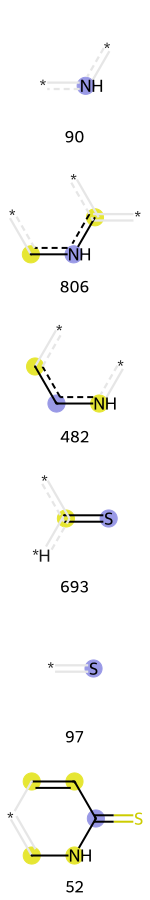

In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "S=C1NC=CC=C1" # 2-mercaptopyridine
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

[00:47:06] DEPRECATION WARNING: please use MorganGenerator


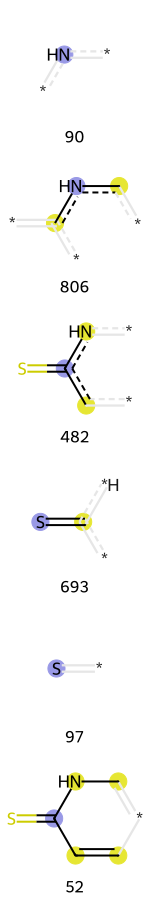

In [26]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "C1=CC(=S)NC=C1C#N" # 6-Mercaptonicotinonitrile
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

[00:47:06] DEPRECATION WARNING: please use MorganGenerator


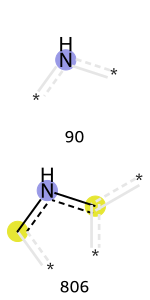

In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "[nH]1cnc2ccccc12" # benzimidazole
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

[00:47:06] DEPRECATION WARNING: please use MorganGenerator


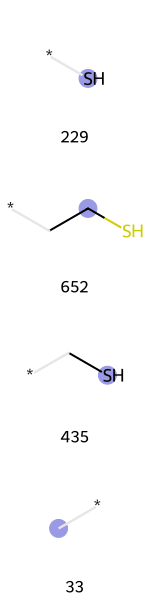

In [28]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "CCCCCCCCS" # 1-octanethiol
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

[00:47:06] DEPRECATION WARNING: please use MorganGenerator


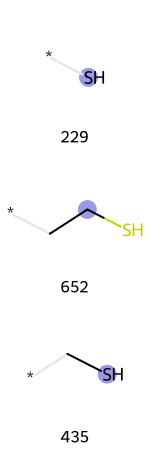

In [29]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "SCCCCS" # 1,4-butanedithiol
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

[00:47:06] DEPRECATION WARNING: please use MorganGenerator


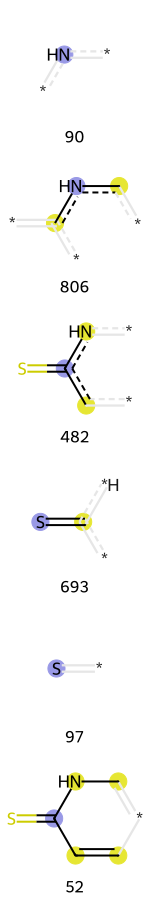

In [30]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "C1=CC(=S)NC=C1Cl" # 5-Chloropyridine-2-thiol
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

## Low activity

[00:47:06] DEPRECATION WARNING: please use MorganGenerator


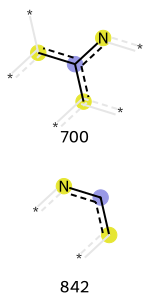

In [31]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "Oc1cccc2cccnc12" # 8-quinolinol
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

## These three don't have any of them

In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "Nc1ccccc1" # aniline
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

[00:47:06] DEPRECATION WARNING: please use MorganGenerator
[00:47:06] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-313/rdkit/Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2025.03.6
	BOOST: 1_85


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "NCCO" # ethanolamine
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

[02:57:46] DEPRECATION WARNING: please use MorganGenerator
[02:57:46] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file /project/build/temp.linux-x86_64-cpython-311/rdkit/Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
Failed Expression: dp_cr
----------
Stacktrace:
----------
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2025.09.2
	BOOST: 1_85


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

smiles = "Oc1ccccc1O" # catechol
mol = Chem.MolFromSmiles(smiles)

highlight_bits = [90, 806, 139, 482, 693, 229, 652, 843, 435, 881, 97, 33, 700, 842, 52]

# Get bitInfo
bit_info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024, bitInfo=bit_info)

# Only keep bits that exist
bits_to_draw = [b for b in highlight_bits if b in bit_info]

# Legends
legends = [str(b) for b in bits_to_draw]

# Draw molecule
img = Draw.DrawMorganBits(
    [(mol, b, bit_info) for b in bits_to_draw],
    molsPerRow=1,
    legends=legends,
    useSVG=False  # return PIL image
)

# Display in Jupyter
display(img)

[02:59:06] DEPRECATION WARNING: please use MorganGenerator
[02:59:06] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file /project/build/temp.linux-x86_64-cpython-311/rdkit/Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
Failed Expression: dp_cr
----------
Stacktrace:
----------
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 211 in file Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2025.09.2
	BOOST: 1_85
